In [1]:
# https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [461]:
import numpy as np
import pandas as pd
import datatable as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler



from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


from sklearn.metrics import (accuracy_score, confusion_matrix, balanced_accuracy_score, 
                roc_auc_score, make_scorer, plot_confusion_matrix, ConfusionMatrixDisplay)


pd.set_option('display.max_rows', 50)

In [88]:

data = pd.read_excel('.\data\Telco_customer_churn.xlsx')

In [89]:
data.head(2)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved


In [92]:
data.shape

(7043, 33)

In [94]:
# To see whether we have balanced data or not

data['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

Dataset is little imbalanced ...

In [95]:
# Looking at different datatypes features
data.dtypes.value_counts()

object     24
int64       6
float64     3
dtype: int64

In [96]:
data.select_dtypes(include='number').columns.tolist()

['Count',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

In [97]:
data.select_dtypes(include='bool').columns.tolist()

[]

In [98]:
data.select_dtypes(include='object').columns.tolist()

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Total Charges',
 'Churn Label',
 'Churn Reason']

In [23]:
#data['Churn']=data['Churn'].map({'No':0,'Yes':1})

In [100]:
data['CustomerID'].nunique()

7043

In [102]:
data.drop('CustomerID', axis = 1, inplace = True)

In [109]:
for col in data.columns:
    print(col)
    print(data[col].nunique())
    print()
    

Count
1

Country
1

State
1

City
1129

Zip Code
1652

Lat Long
1652

Latitude
1652

Longitude
1651

Gender
2

Senior Citizen
2

Partner
2

Dependents
2

Tenure Months
73

Phone Service
2

Multiple Lines
3

Internet Service
3

Online Security
3

Online Backup
3

Device Protection
3

Tech Support
3

Streaming TV
3

Streaming Movies
3

Contract
3

Paperless Billing
2

Payment Method
4

Monthly Charges
1585

Total Charges
6531

Churn Label
2

Churn Value
2

Churn Score
85

CLTV
3438

Churn Reason
20



In [111]:
# Lets drop columns that we dont need 
#'Churn Reason', 'CLTC', 'Churn Score', 'Churn Label', 'Count', 'Country', 'State', 'Lat Long'

data.drop(labels=['Churn Reason', 'CLTV', 'Churn Score', 'Churn Label', 'Count', 'Country', 'State', 'Lat Long'],
         axis = 1, inplace=True)

In [119]:
# for col in data.select_dtypes(include='object').columns.tolist():
    
#     print(data.groupby('Churn Value')[col].value_counts().rename('Count').to_frame())
#     print('\n')

In [120]:
#data.groupby('Churn')['Churn'].value_counts().rename('Count').to_frame()

In [121]:
# for col in data.select_dtypes(include='object').columns.tolist():
    
#     print(data.groupby('Churn Value')[col].value_counts().rename('Count').to_frame())
#     print('\n')

In [122]:
# data.groupby('Churn')['gender'].plot()


In [123]:
# for col in data.select_dtypes(include='object').columns.tolist():
#     if data[col].nunique()<10:

#         sns.barplot(data = data, y = 'Churn Value',x = col)
#         plt.xticks(rotation=45)
#         print('\n')
#         plt.show()
    

In [124]:
# ctrl + /
# '''for col in data.select_dtypes(include='number').columns.tolist():

#     #sns.barplot(data = data, y = 'Churn',x = col)
#     print(col)
#     data.groupby('Churn Value')[col].mean().plot(kind = 'bar')
#     plt.xlabel('Churn Value')
#     plt.ylabel(col)
#     #plt.xticks(rotation=45)
#     print('\n')
#     plt.show()'''

In [126]:
data.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [127]:
data.shape

(7043, 24)

In [131]:
# We want to replace white spaces in cities
data['City'].replace(' ','_',regex=True, inplace=True)

In [133]:
data['City'].head()

0    Los_Angeles
1    Los_Angeles
2    Los_Angeles
3    Los_Angeles
4    Los_Angeles
Name: City, dtype: object

In [137]:
# Also lets remove white spaces from the column names
data.columns=data.columns.str.replace(' ','_', regex = True)

In [138]:
data.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Value'],
      dtype='object')

### Lets see how much of data is missing


In [141]:
data.isnull().sum().sum()

0

### Now we kow that dataset doesn't contain any missing data but what about if any of the features contain unexpected values such as ??, ... or any other garbage values

### For XGBOOST we can replace missing data with zeros. It works pretty well & knows how to deal with it.

In [142]:
# Looking at the datatype of each columns to get a hint if there could be any garbagevalue in numeric column

In [143]:
data.dtypes.value_counts()

object     18
int64       3
float64     3
dtype: int64

In [148]:
data.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [149]:
data.head(2)

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [150]:
# Monthly Charges & Total Charges both should be float but only Monthly Charges is float.
# Total_charges might be an issue here.
# lets try to convert it to float and see

In [154]:
#data['Total_Charges'].astype('float')
# It cant covert string to float means there is some garbage or non number value

In [162]:
pd.to_numeric(data['Total_Charges'])

ValueError: Unable to parse string " " at position 2234

In [163]:
data.iloc[2234,:]

City                            San_Bernardino
Zip_Code                                 92408
Latitude                             34.084909
Longitude                          -117.258107
Gender                                  Female
Senior_Citizen                              No
Partner                                    Yes
Dependents                                  No
Tenure_Months                                0
Phone_Service                               No
Multiple_Lines                No phone service
Internet_Service                           DSL
Online_Security                            Yes
Online_Backup                               No
Device_Protection                          Yes
Tech_Support                               Yes
Streaming_TV                               Yes
Streaming_Movies                            No
Contract                              Two year
Paperless_Billing                          Yes
Payment_Method       Bank transfer (automatic)
Monthly_Charg

In [166]:
data.iloc[2234,-2]
# here we have empty space here

' '

In [174]:
# LEts see how many of spaces do we have
len(data[data['Total_Charges']==' '])

11

In [175]:
data[data['Total_Charges']==' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [178]:
len(data[data['Tenure_Months']==0])

11

In [ ]:
# Looks like these people have not been charged yet or bill has yet not been generated
# We can replace these by 0

In [155]:
# lets use to_numeric & where ever it can't convert it will put null 

In [158]:
pd.to_numeric(data['Total_Charges'], errors='coerce').isnull().sum()

11

We have 11 values that can't be converted to numeric form

In [179]:
data['Total_Charges'] = pd.to_numeric(data['Total_Charges'], errors='coerce')

In [180]:
data['Total_Charges'].isnull().sum()

11

In [181]:
# lets replace them by zero

data['Total_Charges'].fillna(0, inplace=True)

In [182]:
data['Total_Charges'].isnull().sum()

0

In [183]:
data['Total_Charges'] = pd.to_numeric(data['Total_Charges'])

In [185]:
data['Total_Charges'].dtype

dtype('float64')

In [202]:
# lets see if we have white spaces anywhere else
(data==0).sum()

City                    0
Zip_Code                0
Latitude                0
Longitude               0
Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure_Months          11
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges          11
Churn_Value          5174
dtype: int64

In [205]:
# We dont have any empty spaces in our data set
(data==' ').sum()

City                 0
Zip_Code             0
Latitude             0
Longitude            0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Value          0
dtype: int64

In [206]:
# Just to be sure that we ahve repalce emplty spaces with underscores
data.replace(' ','_', regex=True,inplace = True)

In [211]:
(data=='_').any().sum()

0

In [236]:
data.select_dtypes(include='O').columns.tolist()

['City',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method']

### One Hot Encoding these categorical data after splitting them into train & test

In [410]:
# Spliting data into train & test

X_train, X_test, y_train, y_test = train_test_split(
                    data.drop(labels=['Churn_Value'], axis = 1),
                    data['Churn_Value'],
                    test_size=0.3,
                    random_state=0)

In [411]:
X_train.shape, X_test.shape

((4930, 23), (2113, 23))

In [412]:
# K-1 Hot Encoding for categorical data

In [422]:
one_hot_encoder = OneHotEncoder(categories='auto',
                                   drop='first',
                                   sparse=False,
                               handle_unknown='ignore')
one_hot_encoder.fit(X_train[['City',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method']].fillna('Missing'))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

In [423]:
one_hot_encoder.categories_

[array(['Acampo', 'Acton', 'Adelanto', ..., 'Yuba_City', 'Yucaipa',
        'Yucca_Valley'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No_phone_service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber_optic', 'No'], dtype=object),
 array(['No', 'No_internet_service', 'Yes'], dtype=object),
 array(['No', 'No_internet_service', 'Yes'], dtype=object),
 array(['No', 'No_internet_service', 'Yes'], dtype=object),
 array(['No', 'No_internet_service', 'Yes'], dtype=object),
 array(['No', 'No_internet_service', 'Yes'], dtype=object),
 array(['No', 'No_internet_service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One_year', 'Two_year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank_transfer_(automatic)', 'Credit_card_(automatic)',
        'Electronic_check', 'Mailed_check'], dtype=object)]

In [424]:
tmp = one_hot_encoder.transform(X_train[['City',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method']])
tmp_train=pd.DataFrame(tmp, columns=one_hot_encoder.get_feature_names_out() )

In [425]:
# NEW: in latest release of Scikit-learn
# we can now retrieve the feature names as follows:

one_hot_encoder.get_feature_names_out()

array(['City_Acton', 'City_Adelanto', 'City_Adin', ...,
       'Payment_Method_Credit_card_(automatic)',
       'Payment_Method_Electronic_check', 'Payment_Method_Mailed_check'],
      dtype=object)

In [426]:
tmp = one_hot_encoder.transform(X_test[['City',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method']])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [418]:
tmp_test = pd.DataFrame(tmp)
tmp_test.columns = one_hot_encoder.get_feature_names_out()

tmp_test.head()

,City_Acton,City_Adelanto,City_Adin,City_Agoura_Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso_Viejo,City_Alleghany,City_Alpaugh,...,Online_Backup_Yes,Device_Protection_No_internet_service,Device_Protection_Yes,Tech_Support_No_internet_service,Tech_Support_Yes,Streaming_TV_No_internet_service,Streaming_TV_Yes,Streaming_Movies_No_internet_service,Streaming_Movies_Yes,Contract_One_year,Contract_Two_year,Paperless_Billing_Yes,Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [429]:
tmp_train.isna().sum().sum()

0

In [430]:
tmp_train.shape

(4930, 1145)

In [437]:
tmp_train.tail()

,City_Acton,City_Adelanto,City_Adin,City_Agoura_Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso_Viejo,City_Alleghany,City_Alpaugh,...,Online_Backup_Yes,Device_Protection_No_internet_service,Device_Protection_Yes,Tech_Support_No_internet_service,Tech_Support_Yes,Streaming_TV_No_internet_service,Streaming_TV_Yes,Streaming_Movies_No_internet_service,Streaming_Movies_Yes,Contract_One_year,Contract_Two_year,Paperless_Billing_Yes,Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
4925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [431]:
X_train.shape

(4930, 23)

In [439]:
X_train.reset_index()

,index,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,3580,New_Cuyama,93254,34.956577,-119.750142,Female,No,Yes,Yes,4,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Month-to-month,Yes,Electronic_check,19.95,82.90
1,2364,Lake_Isabella,93240,35.607875,-118.466318,Male,No,No,No,1,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Month-to-month,No,Mailed_check,20.05,20.05
2,6813,Torrance,90505,33.807882,-118.347957,Male,No,Yes,No,72,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Credit_card_(automatic),25.75,1864.20
3,789,Grizzly_Flats,95636,38.636102,-120.522149,Male,No,Yes,No,23,Yes,Yes,DSL,No,No,No,No,No,No,One_year,Yes,Credit_card_(automatic),48.35,1067.15
4,561,Ludlow,92338,34.702766,-116.093376,Female,No,No,No,3,Yes,Yes,Fiber_optic,No,No,No,No,No,No,Month-to-month,No,Electronic_check,75.25,242.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,4931,Salinas,93905,36.667794,-121.601306,Female,Yes,No,No,72,Yes,Yes,Fiber_optic,Yes,Yes,Yes,Yes,Yes,Yes,Two_year,Yes,Credit_card_(automatic),117.35,8436.25
4926,3264,Valley_Village,91607,34.165783,-118.399795,Male,Yes,No,No,4,No,No_phone_service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit_card_(automatic),50.95,207.35
4927,1653,Yorkville,95494,38.888351,-123.239647,Female,No,No,No,1,No,No_phone_service,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed_check,35.05,35.05
4928,2607,Saint_Helena,94574,38.581354,-122.296283,Female,No,No,No,58,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Credit_card_(automatic),24.35,1423.85


In [440]:
X_train_enc = pd.merge(X_train.reset_index(),tmp_train,left_index=True, right_index=True)

In [441]:
X_train_enc.shape

(4930, 1169)

In [442]:
# X_train_enc = pd.concat([X_train,tmp_train],axis =1)

In [443]:
X_train_enc.shape

(4930, 1169)

In [444]:
X_train_enc.isnull().sum().sum()

0

In [445]:
X_train_enc.drop(labels=data.select_dtypes(include='O').columns.tolist(), axis = 1, inplace=True)

In [446]:
X_train_enc.shape

(4930, 1152)

In [448]:
X_test_enc = pd.merge(X_test.reset_index(),tmp_test,left_index=True, right_index=True)

In [449]:
X_test_enc.drop(labels=data.select_dtypes(include='O').columns.tolist(), axis = 1, inplace=True)

In [450]:
X_test_enc.shape

(2113, 1152)

In [451]:
y_train.unique()

array([0, 1], dtype=int64)

In [452]:
y_train.sum()/y_train.count()

0.2667342799188641

In [453]:
y_test.sum()/y_test.count()

0.26218646474207286

In [471]:
xgb_c =xgb.XGBClassifier(objective='binary:logistic', missing = 1, seed = 42) 

In [472]:
xgb_c.fit(X_train_enc,
         y_train,
         verbose=True,
         #early_stopping_rounds=10,
         eval_metric='aucpr',
         eval_set=[(X_test_enc,y_test)])

[0]	validation_0-aucpr:0.99820
[1]	validation_0-aucpr:0.99820
[2]	validation_0-aucpr:0.99820
[3]	validation_0-aucpr:0.99820
[4]	validation_0-aucpr:0.99820
[5]	validation_0-aucpr:0.99820
[6]	validation_0-aucpr:0.99820
[7]	validation_0-aucpr:0.99820
[8]	validation_0-aucpr:0.99820
[9]	validation_0-aucpr:0.99820
[10]	validation_0-aucpr:0.99820
[11]	validation_0-aucpr:0.99820
[12]	validation_0-aucpr:0.99820
[13]	validation_0-aucpr:0.99820
[14]	validation_0-aucpr:0.99820
[15]	validation_0-aucpr:0.99820
[16]	validation_0-aucpr:0.99820
[17]	validation_0-aucpr:0.99820
[18]	validation_0-aucpr:0.99820
[19]	validation_0-aucpr:0.99820
[20]	validation_0-aucpr:0.99820
[21]	validation_0-aucpr:0.99820
[22]	validation_0-aucpr:0.99820
[23]	validation_0-aucpr:0.99820
[24]	validation_0-aucpr:0.99820
[25]	validation_0-aucpr:0.99820
[26]	validation_0-aucpr:0.99820
[27]	validation_0-aucpr:0.99820
[28]	validation_0-aucpr:0.99820
[29]	validation_0-aucpr:0.99820
[30]	validation_0-aucpr:0.99820
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [473]:
xgb_c

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [474]:
y_pred = xgb_c.predict(X_test_enc)

In [476]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1558,    1],
       [   0,  554]], dtype=int64)

In [477]:
y_test.isnull().sum().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


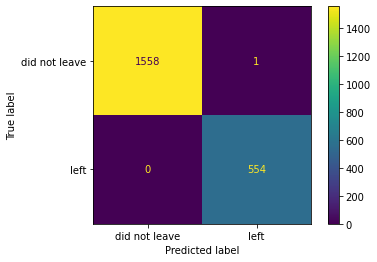

In [478]:
plot_confusion_matrix(xgb_c,
                     X_test_enc,
                     y_test,
                     values_format='d',
                     display_labels=['did not leave','left'])

In [368]:
y_train.ravel().shape

(4930,)

In [369]:
type(np.array(X_train_enc))

numpy.ndarray

In [396]:
X_test_enc.isnull().sum().sum()

1705782